## Spam detection

In [1]:
import numpy as np
import pandas as pd
import chardet
import nltk

In [2]:
with open("spam.csv", "rb") as f:
    result = chardet.detect(f.read(100000))
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}


In [3]:
df = pd.read_csv("spam.csv", encoding = "Windows-1252")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing 
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. website
# 8. Deployment

### 1. Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True) 

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [13]:
encode.fit(df["target"])
dict(zip(encode.classes_, encode.transform(encode.classes_)))

{'ham': 0, 'spam': 1}

In [14]:
df.loc[:, 'target'] = encode.fit_transform(df["target"])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates(keep = 'first')

In [19]:
df.duplicated().sum()

0

### 2. EDA

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

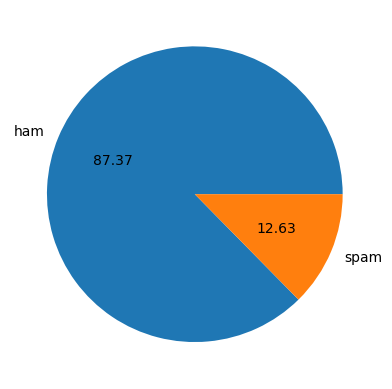

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels= ['ham', 'spam'], autopct="%.2f")
plt.show()

In [22]:
# Data is imbalanced

In [23]:
df.loc[:,'num_charac'] = df['text'].apply(len) # number of characters in ''text'

In [24]:
df.head()

,target,text,num_charac
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shirs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
df.loc[:, 'num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  # using tokenizer counting words in 'text' 

In [27]:
df.loc[:, 'num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # using tokenizer counting sentences in 'text'

In [28]:
df.head()

,target,text,num_charac,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
# 'Describe()' of target values = 0 (ham) not spam
df[df['target']==0].describe()

,num_charac,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# Same for taget values = 1 is spam
df[df['target'] == 1].describe()

,num_charac,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
# Observation on spam messages average number of characters, words and sentences are generally more than Ham messages.

In [32]:
import seaborn as sns

Text(0.5, 0, 'Number of Characters')

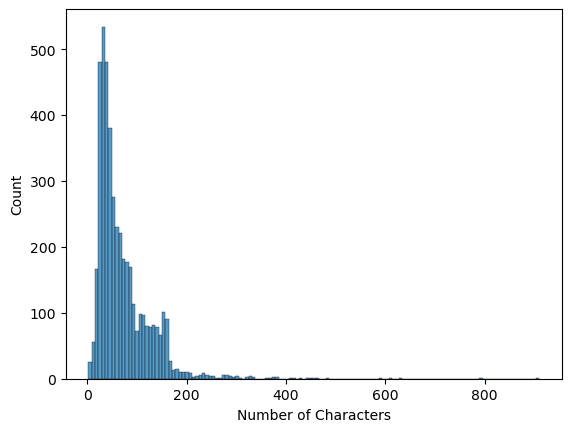

In [33]:
# Histogram of Number of characters of Ham messages
sns.histplot(df[df['target']==0]['num_charac'])
plt.xlabel("Number of Characters")

Text(0.5, 0, 'Number of Characters')

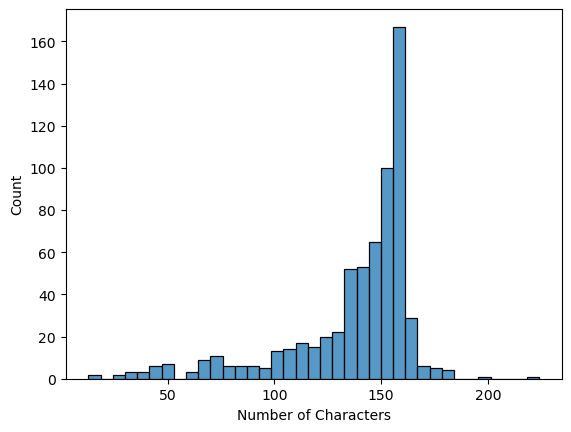

In [34]:
# Histogram of number of characters of spam messages
sns.histplot(df[df['target']==1]['num_charac'])
plt.xlabel("Number of Characters")

Text(0.5, 0, 'Number of Characters')

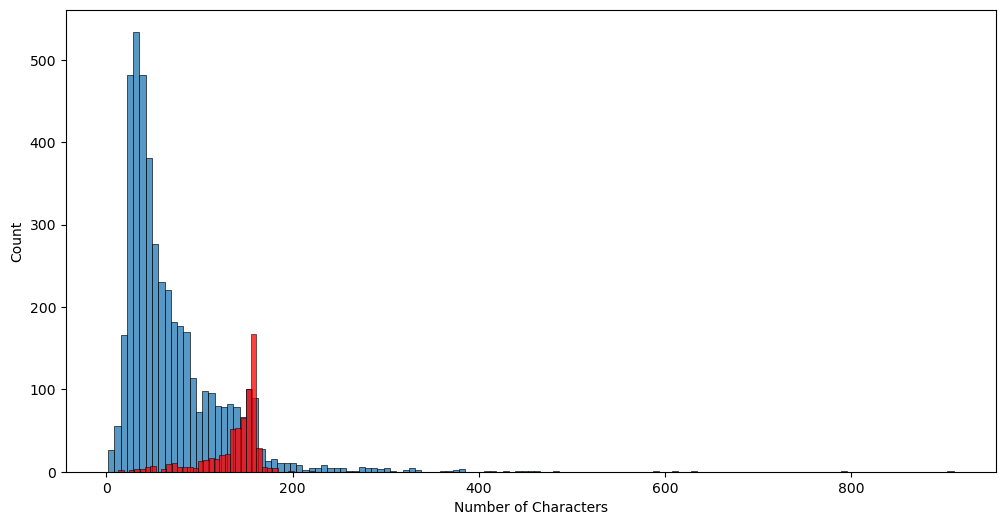

In [35]:
# Clearly shows the number of characters to more in spam
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_charac'])
sns.histplot(df[df['target']==1]['num_charac'], color='red')
plt.xlabel("Number of Characters")

Text(0.5, 0, 'Number of Words')

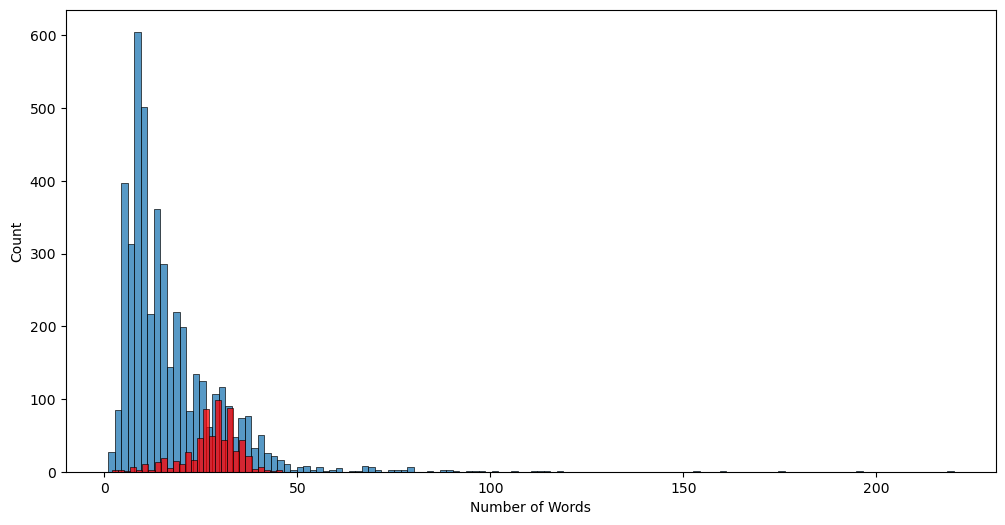

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')
plt.xlabel("Number of Words")

Text(0.5, 0, 'Number of Sentences')

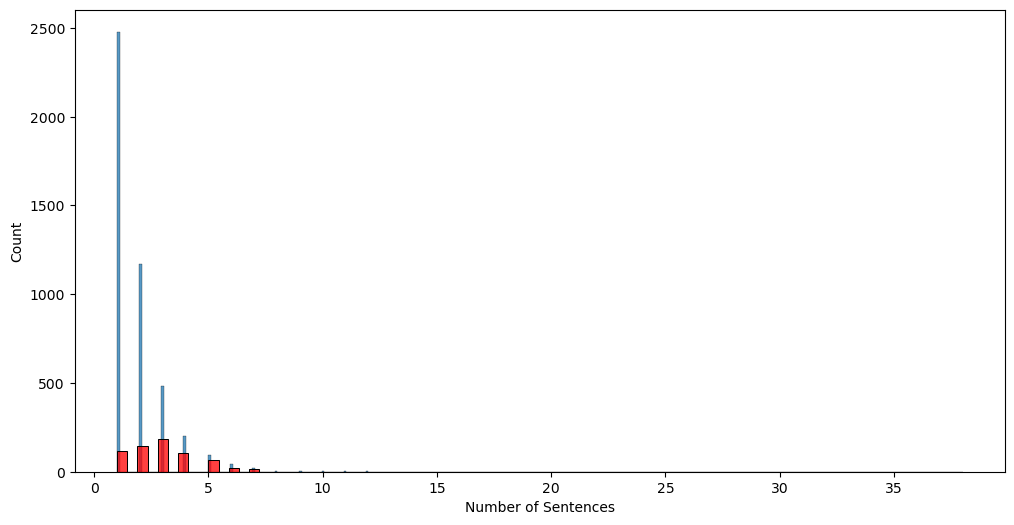

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'], color='red')
plt.xlabel("Number of Sentences")

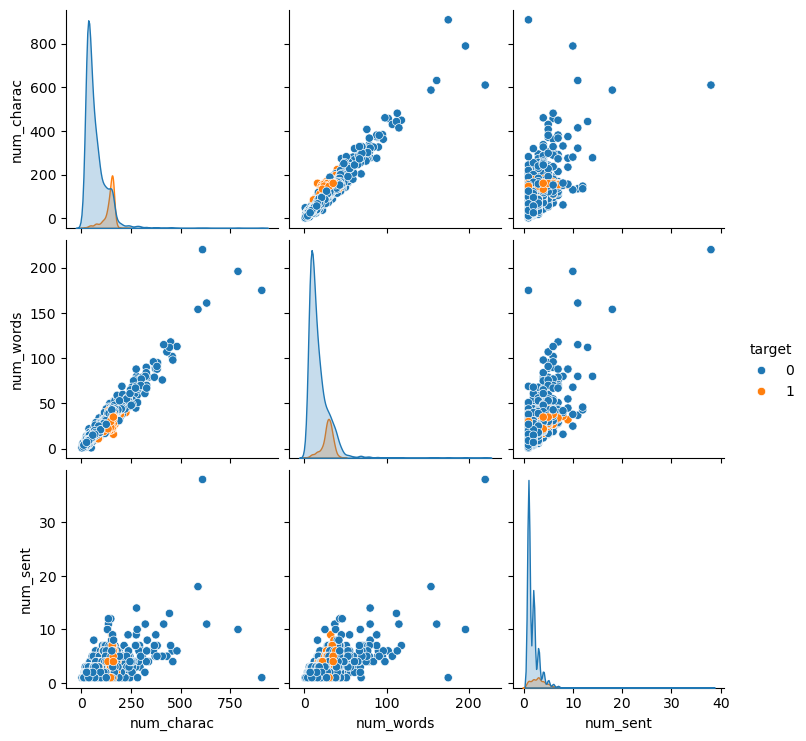

In [38]:
sns.pairplot(df, hue = 'target')

In [39]:
# we could see some outliers here

<Axes: >

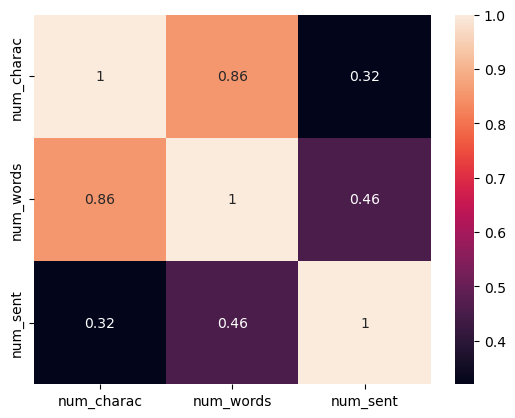

In [40]:
# Heat map of Target = 1 (Spam)
df.head()
sns.heatmap(
    df.loc[df['target']==1, ['num_charac', 'num_words', 'num_sent']].corr(),
    annot = True
)

<Axes: >

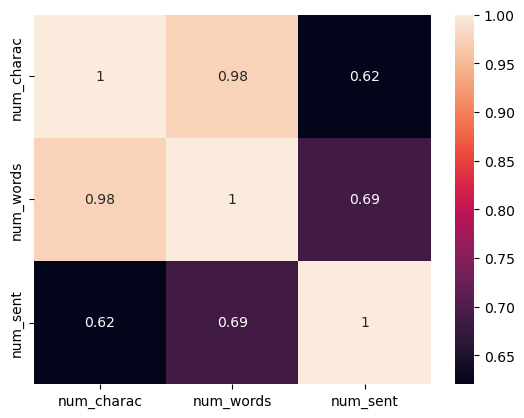

In [41]:
df.head()
sns.heatmap(
    df.loc[df['target']==0, ['num_charac', 'num_words', 'num_sent']].corr(),
    annot = True
)

In [42]:
df.head()

,target,text,num_charac,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

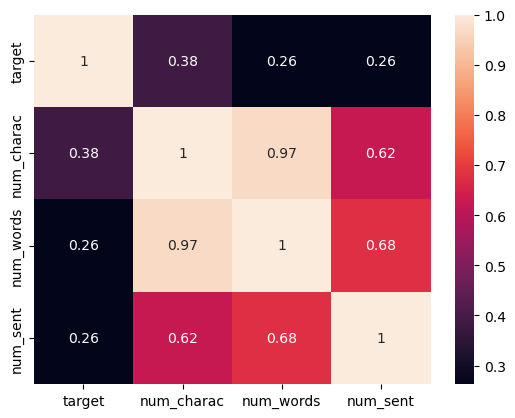

In [43]:
sns.heatmap(df[['target', 'num_charac', 'num_words', 'num_sent']].corr(), annot = True)

### Data Preprocessing
#### - Lower case
#### - Tokenisation
#### - Remove Special characters, punctuation and stop words
#### - Stemming

In [44]:
from nltk.corpus import stopwords

In [45]:
import string

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [47]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y= []
    for i in text:
        if i.isalnum(): # removes the special characters
            y.append(i)

    text = y[:]          # cloning
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:   # filters out the stop words and punctuations
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))              # run the stemming function in this step
        
    return " ".join(y)

In [48]:
transform_text('It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.') # checking the functions

'contain one set sm messag english messag tag acord ham legitim spam'

In [49]:
df.loc[:,'transformed'] = df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_charac,num_words,num_sent,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [52]:
spam_wc = wc.generate(df[df['target']==1]['transformed'].str.cat(sep=" "))

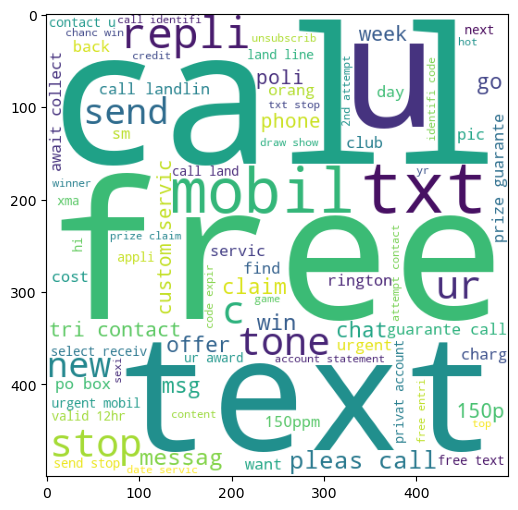

In [53]:
plt.figure(figsize= (15,6))
plt.imshow(spam_wc)

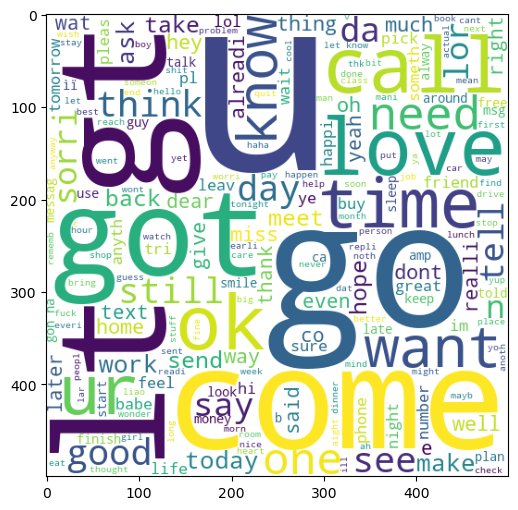

In [54]:
ham_wc = wc.generate(df[df['target']==0]['transformed'].str.cat(sep=" "))
plt.figure(figsize= (15,6))
plt.imshow(ham_wc)

In [55]:
spam_corpus=[]                                           # list of words
for msg in df[df['target']==1]['transformed'].tolist():
    for word in msg.split():                             # remove all the space between words
        spam_corpus.append(word)

In [56]:
len(spam_corpus) # Number of words

9939

In [58]:
from collections import Counter
spam_common = Counter(spam_corpus).most_common(30)
df_spam_common = pd.DataFrame(spam_common, columns=['word', 'count'])

In [59]:
df_spam_common.head()

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


Text(0.5, 1.0, 'Top 30 Most Common Spam Words')

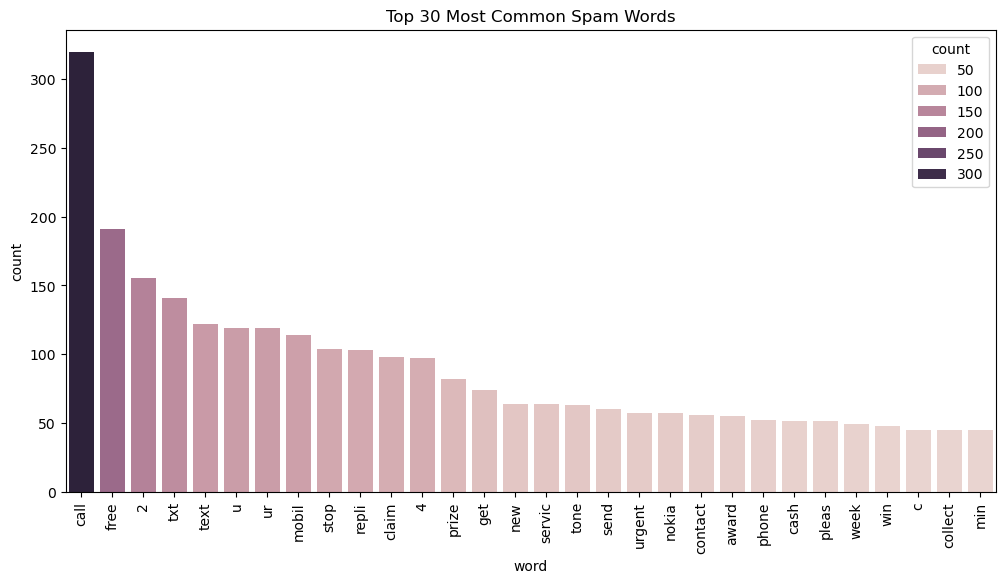

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x= 'word', y= 'count', data= df_spam_common, hue='count')
plt.xticks(rotation=90)
plt.title("Top 30 Most Common Spam Words")

Text(0.5, 1.0, 'Top 30 Most Common Ham Words')

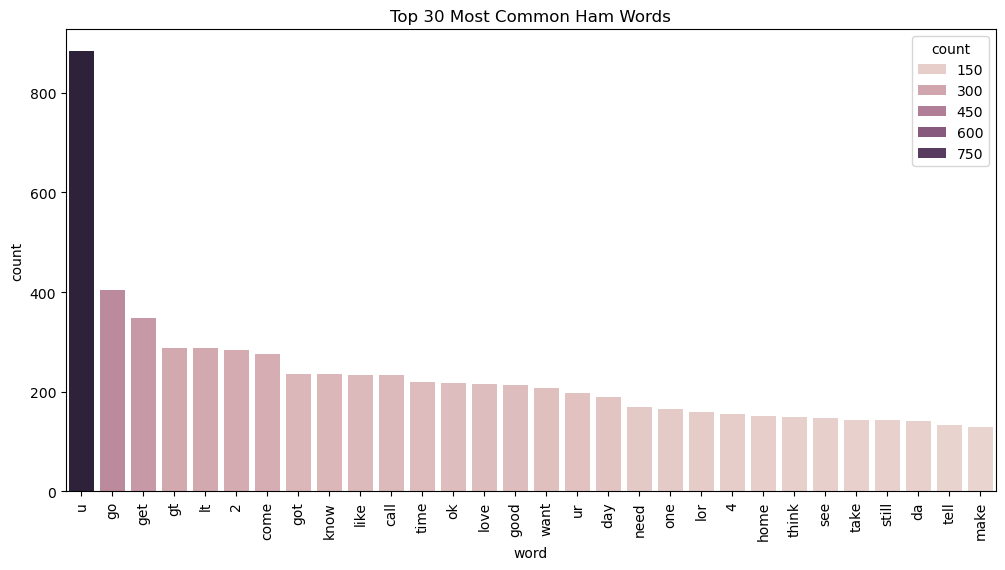

In [61]:
# Similarly for Ham(Non-Spam) words
ham_corpus=[]                                           # list of words
for msg in df[df['target']==0]['transformed'].tolist():
    for word in msg.split():                             # remove all the space between words
        ham_corpus.append(word)

ham_common = Counter(ham_corpus).most_common(30)
df_ham_common = pd.DataFrame(ham_common, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x= 'word', y= 'count', data= df_ham_common, hue='count')
plt.xticks(rotation=90)
plt.title("Top 30 Most Common Ham Words")

## 4.Model Building

In [92]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [63]:
X = cv.fit_transform(df['transformed']).toarray()

In [64]:
X.shape

(5169, 6708)

In [65]:
y = df['target'].values.astype(int)

In [66]:
y.shape

(5169,)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [72]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [73]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


#### Using TFIDF 

In [93]:
X = tfid.fit_transform(df['transformed']).toarray()

In [94]:
X.shape

(5169, 3000)

In [95]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [96]:
gnb.fit(X1_train, y1_train)
y1_pred1 = gnb.predict(X1_test)
mnb.fit(X1_train, y1_train)
y1_pred2 = mnb.predict(X1_test)
bnb.fit(X1_train, y1_train)
y1_pred3 = bnb.predict(X1_test)

In [97]:
#gnb
print(accuracy_score(y1_test, y1_pred1))
print(confusion_matrix(y1_test, y1_pred1))
print(precision_score(y1_test, y1_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [98]:
#mnb
print(accuracy_score(y1_test, y1_pred2))
print(confusion_matrix(y1_test, y1_pred2))
print(precision_score(y1_test, y1_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [99]:
#bnb
print(accuracy_score(y1_test, y1_pred3))
print(confusion_matrix(y1_test, y1_pred3))
print(precision_score(y1_test, y1_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#### Best approach: using tfid --> MNB (MultinomialNB) with best precision code with best precision 

In [81]:
# We will do some quick detailed cross ML model comparison to be extra sure of best model that might work better.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
# setting up with basic parameters
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
# making a dictionary of models with the initials for loop functions
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [84]:
# function to fit model with xtrain, ytrain, xtest, ytest and extract accuracy and precision score 
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [85]:
train_classifier(svc,X_train,y_train,X_test,y_test) # to test the classifier functions 

(0.9264990328820116, 0.7421875)

In [86]:
# making a for loop functions to call models from classifiers items and print the initials with its accuracy 

acc_scores = []
prec_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    acc_scores.append(current_accuracy)
    prec_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9197292069632496
Precision -  0.9365079365079365
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9743589743589743


In [88]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc_scores,'Precision':prec_scores}).sort_values('Precision',ascending=False)

In [89]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
10,xgb,0.973888,0.974359
4,LR,0.970986,0.973684
9,GBDT,0.943907,0.944444
3,DT,0.926499,0.942857
6,AdaBoost,0.919729,0.936508
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


In [90]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,xgb,Accuracy,0.973888
4,LR,Accuracy,0.970986
5,GBDT,Accuracy,0.943907
6,DT,Accuracy,0.926499
7,AdaBoost,Accuracy,0.919729
8,BgC,Accuracy,0.962282
9,NB,Accuracy,0.964217


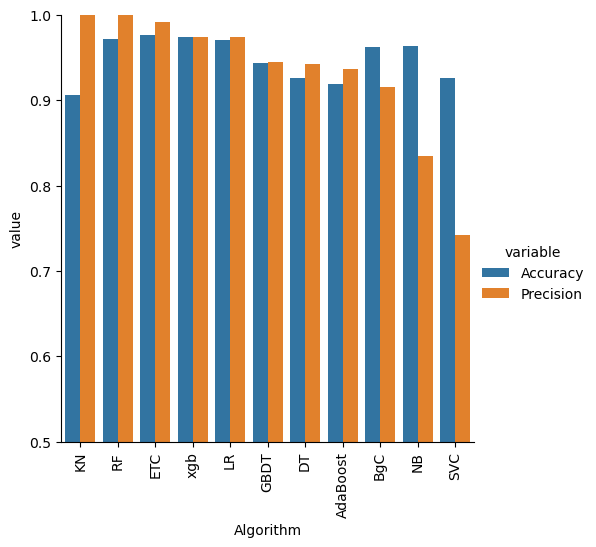

In [91]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#### Clearly Random forest proving to be best in terms of Accuracy and Precision of 100% BUT it is quite prone to overfitting and extremly slow when 
#### dealing with larger model. Our Safe bet would be sticking with NB even though default is showing worst score but Multinomial version has the 
#### 100% Precision. We will rather focus on 100% precision with faster exceution. We can further work on max_feature parameter to get the best result from TFIDF.
#### With Max features set on 3000 instead of 6000 default it has greatly improved the accuracy and Precision: 
##### -Smaller, informative vocab often improves NB, 
##### -Too few features → you risk underfitting (miss subtle spam signals), 
##### -Too many features → you risk overfitting + noise, 
##### -Sweet spot depends on dataset (for SMS spam, usually ~2000–4000 words is plenty).

In [101]:
# We will create some spicy 'pickle'
import pickle
pickle.dump(tfid, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))